In [2]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt

basketballdata = pd.ExcelFile("basketball.xlsx").parse(0)
basketballdata.drop(["height","weight"], axis=1, inplace=True)
print basketballdata.head(5)

   field goal percent  free throw percent  points per game
0               0.442               0.672              9.2
1               0.435               0.797             11.7
2               0.456               0.761             15.8
3               0.416               0.651              8.6
4               0.449               0.900             23.2


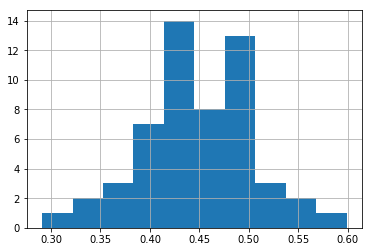

In [4]:
basketballdata["field goal percent"].hist()

In [5]:
# The data looks good as it is shaped like a bell. 

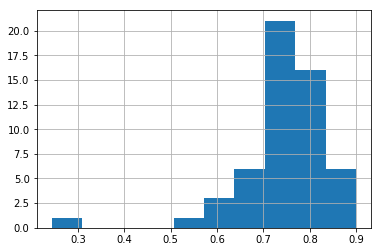

In [6]:
basketballdata["free throw percent"].hist()

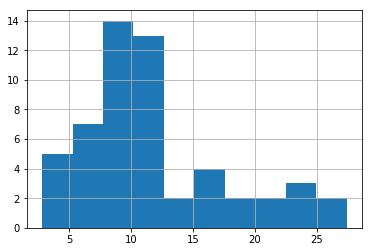

In [7]:
#The data does not loos as good as it is right skewed.
basketballdata["points per game"].hist()

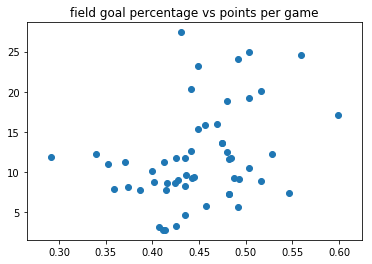

In [8]:
plt.title('field goal percentage vs points per game')
plt.scatter(basketballdata["field goal percent"], basketballdata["points per game"])

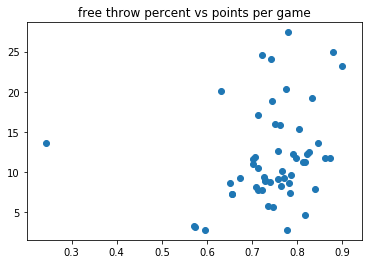

In [9]:
plt.title('free throw percent vs points per game')
plt.scatter(basketballdata["free throw percent"], basketballdata["points per game"])

In [10]:
import statsmodels.api as sm
x = basketballdata[["free throw percent", "field goal percent"]]
x = sm.add_constant(x)
y = basketballdata["points per game"]
model = sm.OLS(y,x).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:        points per game   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5.516
Date:                Sat, 03 Nov 2018   Prob (F-statistic):            0.00678
Time:                        20:11:51   Log-Likelihood:                -166.67
No. Observations:                  54   AIC:                             339.3
Df Residuals:                      51   BIC:                             345.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2774      8

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1F5470>,
      dtype=object)

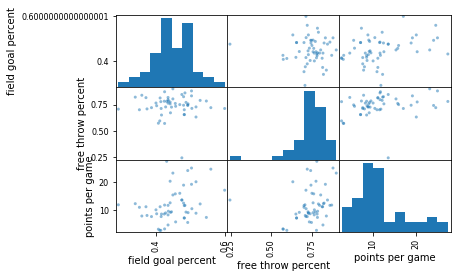

In [12]:
pd.plotting.scatter_matrix(basketballdata)

In [19]:
ftoutlier = basketballdata[basketballdata["free throw percent"] <0.5]
print ftoutlier

    field goal percent  free throw percent  points per game
22               0.475               0.244             13.6


AxesSubplot(0.125,0.125;0.775x0.755)


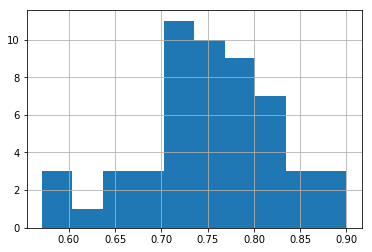

In [17]:
dropOutlier = basketballdata.drop(22, axis=0)
print dropOutlier["free throw percent"].hist()


AxesSubplot(0.125,0.125;0.775x0.755)


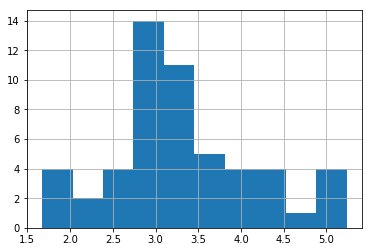

In [42]:
import numpy as np
dropOutlier["sqrtppg"]=np.sqrt(dropOutlier["points per game"])
print dropOutlier["sqrtppg"].hist()


In [43]:
x = dropOutlier[["free throw percent", "field goal percent"]]
x = sm.add_constant(x)
y = dropOutlier["sqrtppg"]
model = sm.OLS(y,x).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                sqrtppg   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     9.564
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           0.000304
Time:                        14:21:46   Log-Likelihood:                -57.621
No. Observations:                  53   AIC:                             121.2
Df Residuals:                      50   BIC:                             127.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3761      1